In [1]:
#@title Import libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import time  # Import the time module

#Data Preparation

In [2]:
# Load the MNIST dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print("TRAINNG DATA")
# Can see that in x data we have 60,000 28x28 pixel images
print(x_train.shape)
# Can see that we have one label for each of the 60,000 images
print(y_train.shape)

print("\nTESTING DATA")
# Can see that in x data we have 10,000 28x28 pixel images
print(x_test.shape)
# Can see that we have one label for each of the 10,000 images
print(y_test.shape)

print('\n Testing to Training ratio =', x_test.shape[0]/x_train.shape[0])

TRAINNG DATA
(60000, 28, 28)
(60000,)

TESTING DATA
(10000, 28, 28)
(10000,)

 Testing to Training ratio = 0.16666666666666666


In [4]:
# Can see each element in x data is 28x28 array where each value is the grayscale value of the pixel from 0-255 where black(255)/white(0)
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [5]:
# Normalize the x data to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
# Can see that we successfully normalized x data
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1666666, random_state=42)


#Build and Compile the Model

In [8]:
# Build the CNN model
model = keras.Sequential([

    # 1st Convolutional Layer with 32 filters and 3x3 kernel size
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # 2nd Convolutional Layer with 64 filters and 3x3 kernel size
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten the output for the fully connected layers
    layers.Flatten(),

    # Fully connected layer
    layers.Dense(units=128, activation='relu'),

    # Additional hidden layer
    layers.Dense(units=60, activation='relu'),

    # Output layer for classification (10 classes)
    layers.Dense(units=10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 60)                  │           7,740 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 232,094 (906.62 KB)

 Trainable params: 232,094 (906.62 KB)

 Non-trainable params: 0 (0.00 B)

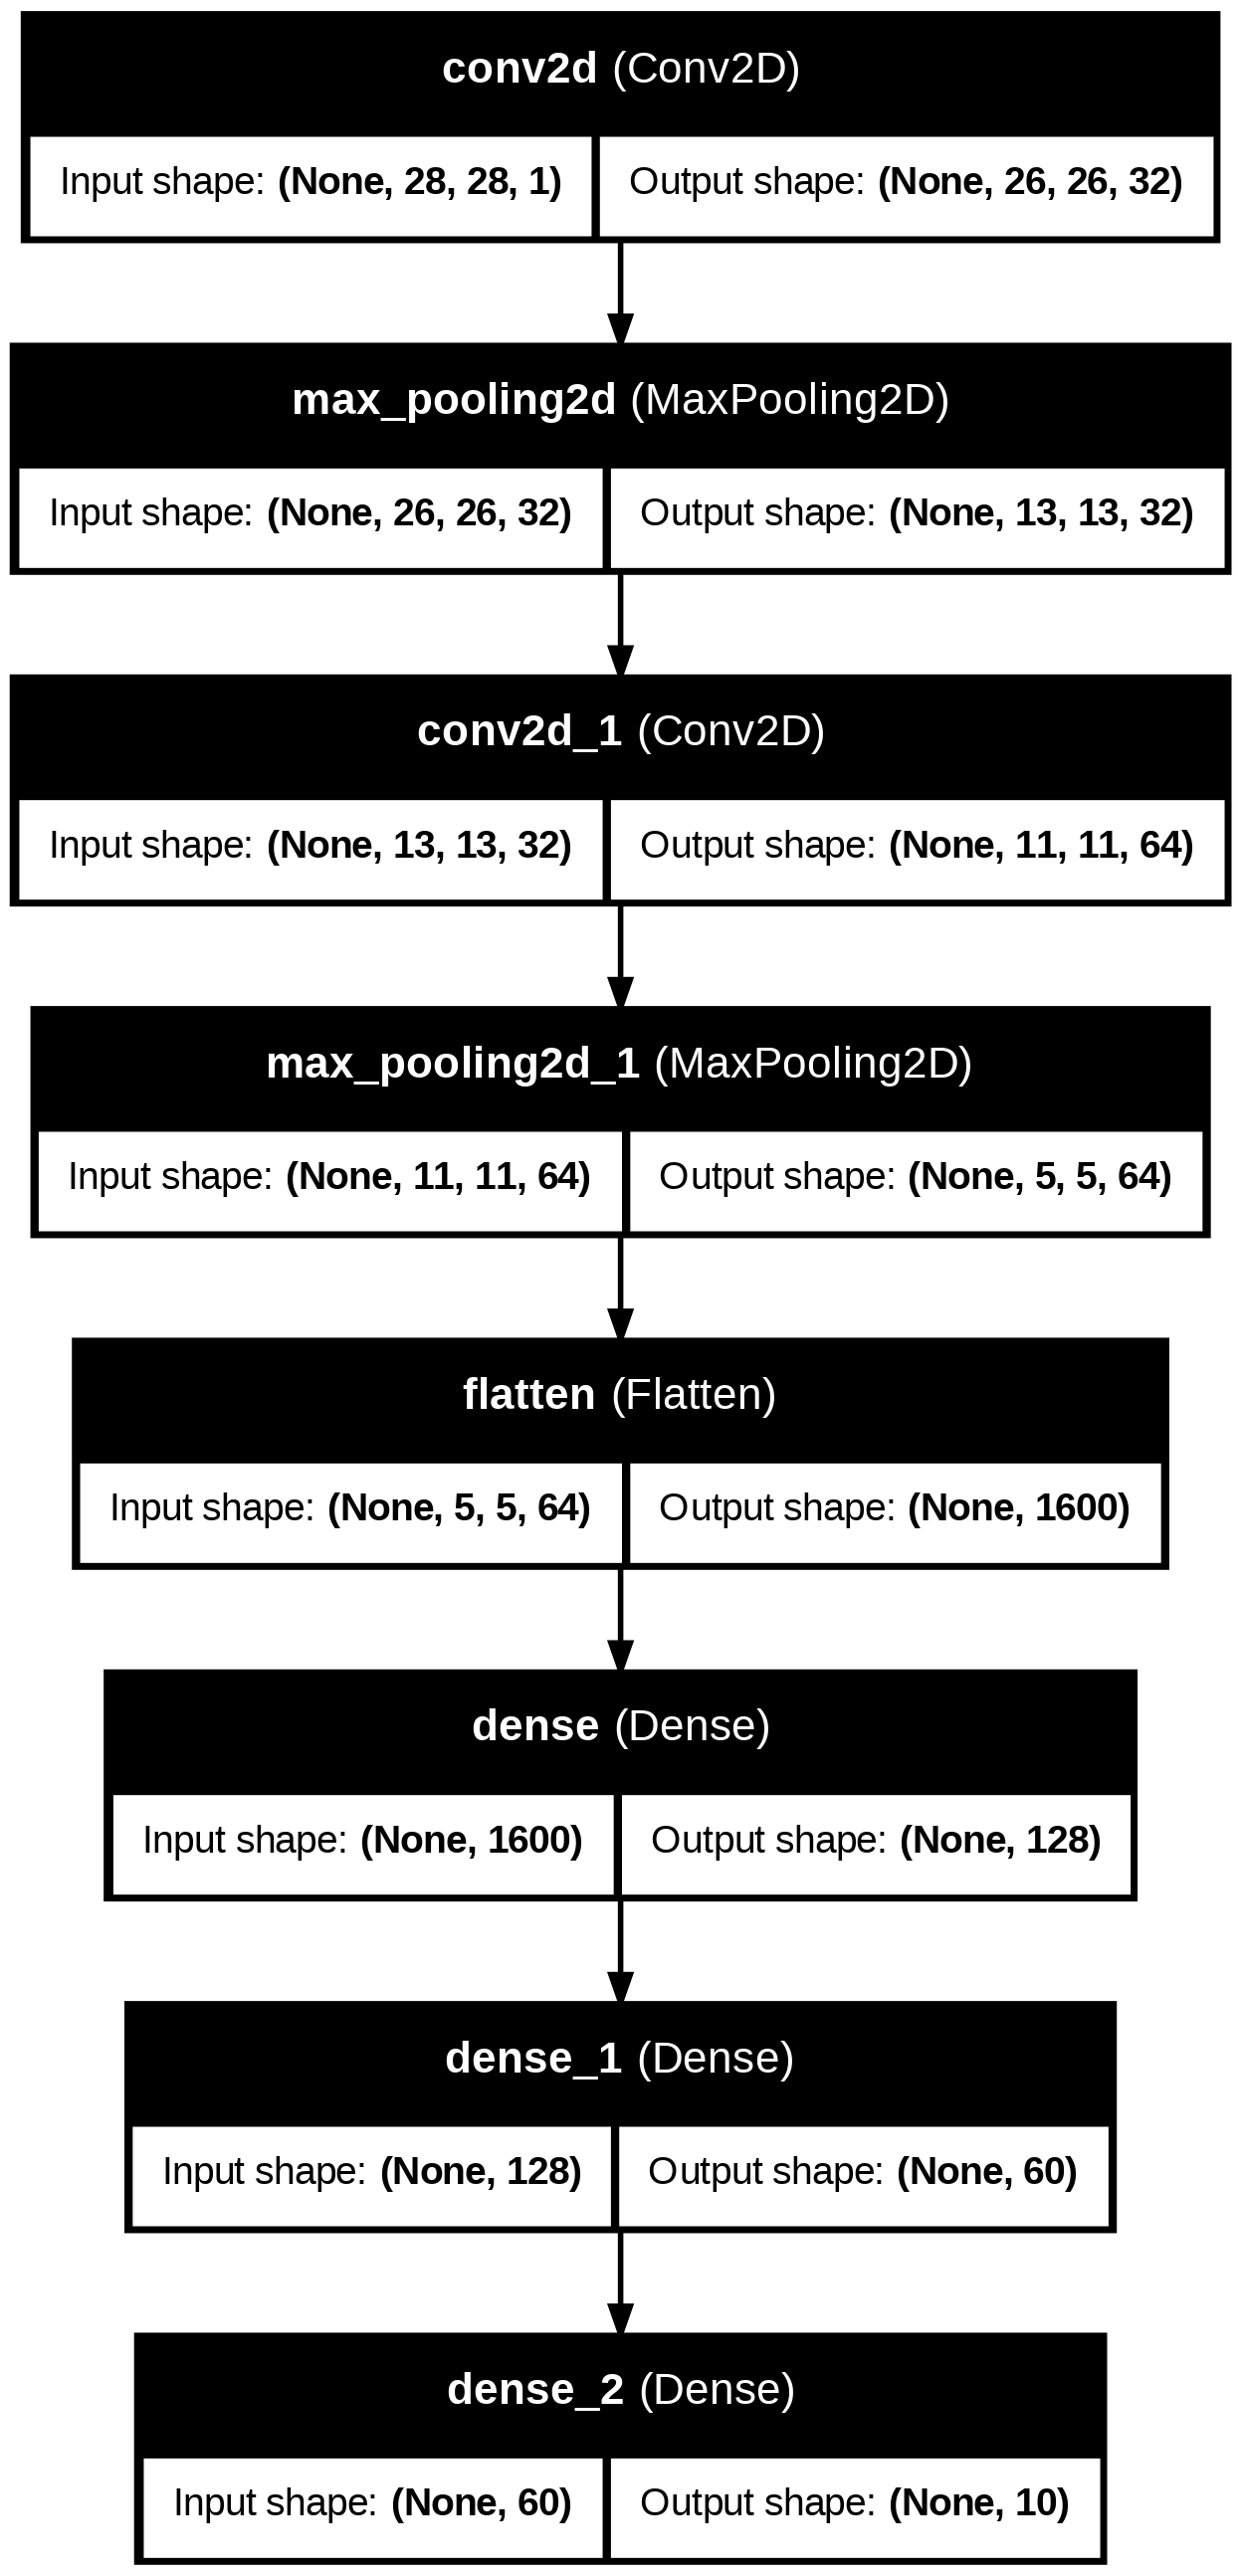

In [10]:
from tensorflow.keras.utils import plot_model

# Plot and save the model architecture as a diagram
plot_model(model, to_file='simple_cnn_model.png', show_shapes=True, show_layer_names=True)


#Train the Model

In [11]:
# Record the start time before training
start_time = time.time()

# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))

# Record the end time after training
end_time = time.time()

# Print the total training time
total_training_time = end_time - start_time
print(f"Total training time: {total_training_time:.2f} seconds")

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 40ms/step - accuracy: 0.7534 - loss: 0.6797 - val_accuracy: 0.8713 - val_loss: 0.3539
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 37ms/step - accuracy: 0.8786 - loss: 0.3328 - val_accuracy: 0.8897 - val_loss: 0.2987
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.8971 - loss: 0.2795 - val_accuracy: 0.8929 - val_loss: 0.2907
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.9084 - loss: 0.2449 - val_accuracy: 0.9088 - val_loss: 0.2589
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.9193 - loss: 0.2149 - val_accuracy: 0.8977 - val_loss: 0.2721
Total training time: 350.49 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8971 - loss: 0.2814
Test accuracy: 0.8954


In [12]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy and loss
def plot_history(history, model_name='Model'):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
    plt.title('Training and Validation Accuracy for ' + model_name)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title('Training and Validation Loss for ' + model_name)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

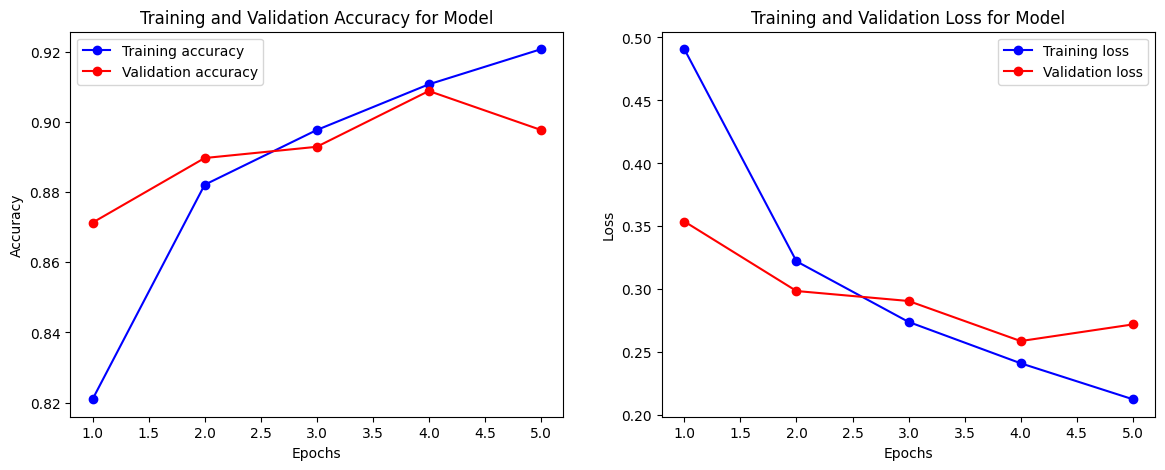

In [13]:

# Call the function to plot learning curves
plot_history(history)


Initially, I set the number of epochs for my model to 10, but I noticed that it took a considerable amount of time to complete the training process. After the model finished running, the test accuracy achieved was around 0.90. To optimize the time efficiency, I decided to reduce the number of epochs to 5 and observed that the training completed much faster. Interestingly, while there was a slight reduction in the test accuracy, it was not a significant drop. The accuracy still remained fairly high, suggesting that the model's performance did not degrade drastically despite the reduction in epochs.




# Model Performance

In [14]:
# Have model make predictions on test data
y_pred = model.predict(x_test)

# Convert predictions to class labels
y_pred = np.argmax(y_pred, axis=1)

print(y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
[9 2 1 ... 8 1 5]



Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85      1000
           1       1.00      0.97      0.99      1000
           2       0.75      0.90      0.82      1000
           3       0.90      0.93      0.91      1000
           4       0.87      0.75      0.81      1000
           5       0.99      0.98      0.98      1000
           6       0.78      0.63      0.70      1000
           7       0.92      0.98      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.98      0.93      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.89     10000
weighted avg       0.90      0.90      0.89     10000
 




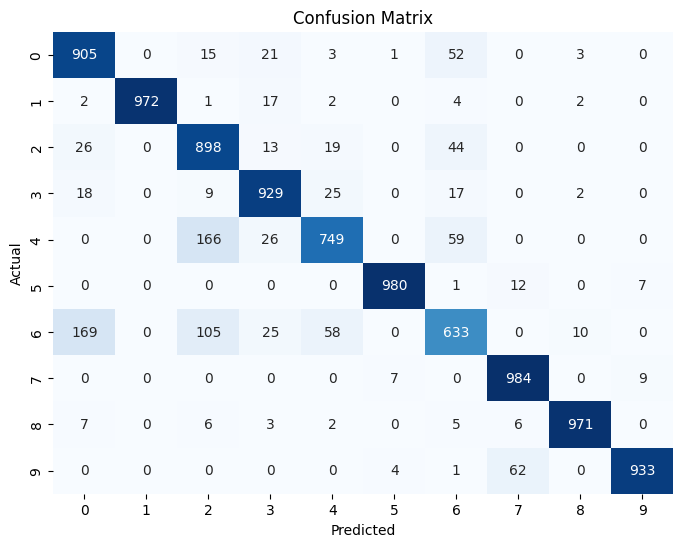

In [15]:
# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred), '\n\n')

# Make confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

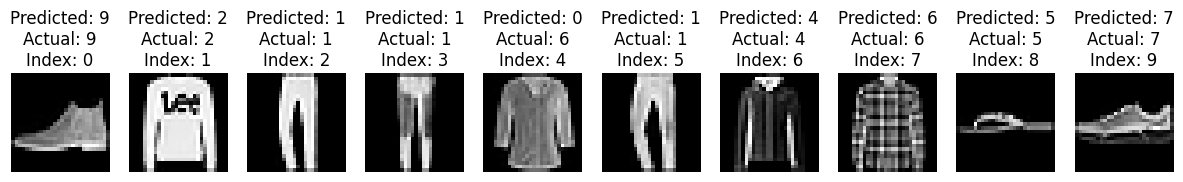

In [16]:
# Display some test images and their predicted labels
num_samples = 10
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Predicted: {y_pred[i]}\nActual: {y_test[i]}\nIndex: {i}")
    plt.axis('off')
plt.show()

PREDICTION ERRORS



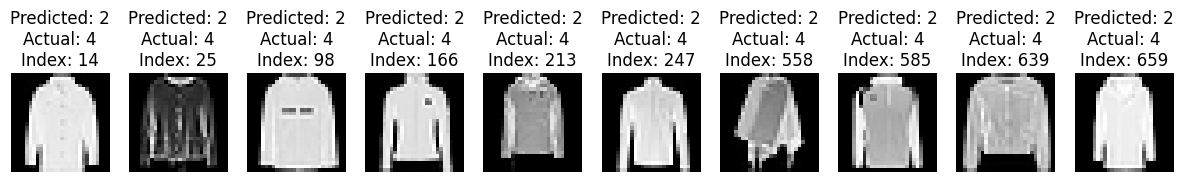

In [17]:
# Select the indices of the worst categorized images
missed_indices = np.where( (y_pred==2) & (y_test==4) )[0]

# Determine the number of samples to display (up to 10)
num_samples = min(len(missed_indices), 10)

print('PREDICTION ERRORS\n')

# Display the predicted '1' images
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    idx = missed_indices[i]
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"Predicted: {y_pred[idx]}\nActual: {y_test[idx]}\nIndex: {idx}")
    plt.axis('off')
plt.show()

PREDICTION ERRORS



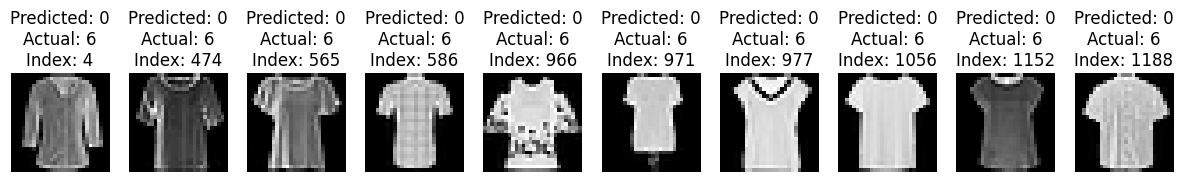

In [18]:
# Select the indices of the worst categorized images
missed_indices = np.where( (y_pred==0) & (y_test==6) )[0]

# Determine the number of samples to display (up to 10)
num_samples = min(len(missed_indices), 10)

print('PREDICTION ERRORS\n')

# Display the predicted '1' images
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    idx = missed_indices[i]
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"Predicted: {y_pred[idx]}\nActual: {y_test[idx]}\nIndex: {idx}")
    plt.axis('off')
plt.show()

In [19]:
from sklearn.metrics import f1_score

# Calculate F1 score
test_f1_score = f1_score(y_test, y_pred, average='weighted')

# Print the F1 score
print("F1 Score:", test_f1_score)

F1 Score: 0.8941678822067761


In [20]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

# Print the test accuracy
print(f"Test accuracy: {test_acc:.4f}")

Test accuracy: 0.8954


# Comparison of ANN and CNN models

In [22]:
import pandas as pd

# Define data
data = {
    "Model Type": ["ANN", "CNN"],
    "Number of Parameters": [108830, 121930],
    "Memory Usage (MB)": [0.41, 1.63],
    "Training Time (sec)": [77.06, 359.56],
    "Test Accuracy": [0.88, 0.89],
    "Test F1 Score": [0.88, 0.89]
}
# Create DataFrame
df = pd.DataFrame(data) # Now 'pd' is recognized as pandas

# Display the DataFrame as a table
df

,Model Type,Number of Parameters,Memory Usage (MB),Training Time (sec),Test Accuracy,Test F1 Score
0,ANN,108830,0.41,77.06,0.88,0.88
1,CNN,121930,1.63,359.56,0.89,0.89


#Summary and Reflection

Initially, I set the number of epochs for my model to 10, but I noticed that it took a considerable amount of time to complete the training process. After the model finished running, the test accuracy achieved was around 0.90. To optimize the time efficiency, I decided to reduce the number of epochs to 5 and observed that the training completed much faster. Interestingly, while there was a slight reduction in the test accuracy, it was not a significant drop. The accuracy still remained fairly high, suggesting that the model's performance did not degrade drastically despite the reduction in epochs.

Overall, the model maintained solid performance, balancing between accuracy and training time. This change demonstrated that reducing the number of epochs did not lead to a significant degradation in the model's ability to classify, and the overall performance of the model remained satisfactory despite the adjustment.






